# Food Delivery Preferences

## Data
The data for this project can be downloaded from Kaggle using this link: https://www.kaggle.com/datasets/sujalsuthar/food-delivery-order-history-data . It contains 21,321 food order records from 6 hypothetical restaurants. Note that the header names in this file had spaces so I renamed them manually before importing the file.

## Goal
The aim is to answer questions of the following type: 
 - Does a restuarant have the same customers placing orders multiple times? i.e. do they have regular customers?
 - Are the regular customers mostly local?
 - Do regular customers get more offers?
 - When do customers place most of their orders?
   
## Next Steps: Answer the following:
 - When do customers decide to leave a rating?
 - Is the number of items they order affected by the promotion the restaurant runs? 
 - Is the waiting time for the rider at the restaurant dependent upon the number of items in the order or on the time of the day, etc.?
 - What are the bestsellers for each restaurant?

In [511]:
### installing packages (here requirements.txt contains more packages than we actually require)
%pip install -r requirements.txt

  Using cached absl_py-1.4.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached attrs-22.2.0-py3-none-any.whl.metadata (13 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl.metadata (2.9 kB)
  Using cached charset_normalizer-3.0.1-py3-none-any.whl.metadata (27 kB)
  Using cached contourpy-1.0.7.tar.gz (13.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached eli5-0.13.0.tar.gz (216 kB)
  Preparing metadata (setup.py) ... done
  Using cached flatbuffers-23.1.21-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached fonttools-4.38.0-py3-none-any.whl.metadata (138 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl.metadata (12 kB)
  Using cached grpcio-1.51.1.tar.gz (22.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached h5py-3.8.0.tar.gz (400 kB)

In [513]:
#loading the dataset
import pandas as pd

orders = pd.read_excel("data/order_history_kaggle_data_renamed.xlsx")

pd.set_option('display.max_columns', None)
orders.head()

,rest_id,rest_name,subzone,city,order_id,order_time,status,delivery_company,distance,item_list,instructions,discount_offered,bill_subtotal,packing_charges,discount_amount_promo,discount_amount_freebies,subscription_discount,brand_discount,bill_total,rating,review,reason_cancellation,rest_compensation_cancellation,rest_penalty_rejection,minutes_taken,rider_wait_time_minutes,order_marked,complaint,customer_id
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [515]:
# looking at missing value counts
print("Missing values by column:")
print(orders.isna().sum())

# looking at different value counts
print("Unique Value counts for some columns:")
print(orders.status.value_counts())
print(orders.rest_name.value_counts())
print(orders.rating.value_counts())
print(orders.distance.value_counts())
print(orders.order_marked.value_counts())
print(orders.discount_offered.value_counts())
print(orders.item_list.value_counts())


Missing values by column:
rest_id                               0
rest_name                             0
subzone                               0
city                                  0
order_id                              0
order_time                            0
status                                0
delivery_company                      0
distance                              0
item_list                             0
instructions                      20601
discount_offered                   5498
bill_subtotal                         0
packing_charges                       0
discount_amount_promo                 0
discount_amount_freebies              0
subscription_discount                 0
brand_discount                        0
bill_total                            0
rating                            18830
review                            21025
reason_cancellation               21135
rest_compensation_cancellation    21188
rest_penalty_rejection            21318
minutes_taken 

We see above that very few people decide to leave a rating. Most of them leave a good one. Thus, it'll be interesting to look at when people leave ratings. Almost all the orders are delivered with very few rejections and even fewer cancellations/returns. Most orders are from local customers. The bulk of the orders we have a record for are from 2 restaurants: Aura Pizzas and Swaad. Most orders are marked correctly, however, since we do not know what exactly this means, we'll ignore it. We see that the "discount_offered" variable contains specific details. Thus, it may be useful to create a separate variable looking at discount types such as "Flat discounts", "Buy 1 Get 1", "capped discounts", etc. Another issue is the way the items ordered are recorded. We would need to manipulate this in order to get information such as the number of items ordered.


## Cleaning the data

In [517]:
#get numeric distance
# Remove the last 2 characters
orders= orders.assign(distance_num=orders.distance.str.rstrip('km'))
orders['distance_num']=orders['distance_num'].replace('<1', '0')
orders['distance_num']=orders['distance_num'].astype(int)
orders.head()
print(orders.distance_num.value_counts())
print(orders["distance_num"][1], type(orders["distance_num"][1]))

distance_num
2     3558
1     3346
3     3212
4     2410
5     2140
6     2112
7     1282
9      767
8      709
0      649
10     384
11     253
12     115
16      87
14      82
15      77
13      63
17      26
18      25
19      19
20       3
21       2
Name: count, dtype: int64
2 <class 'numpy.int64'>


In [519]:
# get a discount type for each discount
orders["discount_type"] = orders["discount_offered"].fillna("None")

import numpy as np
orders['discount_type'] = np.where(orders['discount_type'].str.contains('Flat'), 'flat', orders.discount_type)
orders['discount_type'] = np.where(orders['discount_type'].str.contains('off upto'), 'capped', orders.discount_type)
orders['discount_type'] = np.where(orders['discount_type'].str.contains('Buy|Get'), 'buy_get', orders.discount_type)
##only other type of discount is 'rs. 0.0' which is unclear, 2 observations are affected by this, I code it as flat
orders['discount_type'] = np.where(orders['discount_type'].str.contains('flat|None|capped|buy_get'),orders.discount_type,'flat')
print(orders.discount_type.value_counts())

##### get dummies for discount types:
disc_dummy= pd.get_dummies(orders['discount_type'])
print(disc_dummy.head())
orders= pd.concat([orders,disc_dummy], axis=1)
orders.rename(columns={"None": "no_discount"})
orders.head()

### let's ignore discount amounts for now!

discount_type
flat       5927
None       5498
capped     5275
buy_get    4621
Name: count, dtype: int64
    None  buy_get  capped   flat
0  False    False    True  False
1  False    False   False   True
2  False    False    True  False
3  False    False    True  False
4  False    False    True  False


,rest_id,rest_name,subzone,city,order_id,order_time,status,delivery_company,distance,item_list,instructions,discount_offered,bill_subtotal,packing_charges,discount_amount_promo,discount_amount_freebies,subscription_discount,brand_discount,bill_total,rating,review,reason_cancellation,rest_compensation_cancellation,rest_penalty_rejection,minutes_taken,rider_wait_time_minutes,order_marked,complaint,customer_id,distance_num,discount_type,None,buy_get,capped,flat
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...,3,capped,False,False,True,False
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...,2,flat,False,False,False,True
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...,0,capped,False,False,True,False
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...,2,capped,False,False,True,False
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...,2,capped,False,False,True,False


In [251]:
#Getting the number of items in the order!

#incomplete but perhaps I try to separate the items using the commas and the quantities by specifying to look at the number before 'x' and then adding it up?
#need to check more on how to execute it


,rest_id,rest_name,subzone,city,order_id,order_time,status,delivery_company,distance,item_list,instructions,discount_offered,bill_subtotal,packing_charges,discount_amount_promo,discount_amount_freebies,subscription_discount,brand_discount,bill_total,rating,review,reason_cancellation,rest_compensation_cancellation,rest_penalty_rejection,minutes_taken,rider_wait_time_minutes,order_marked,complaint,customer_id,distance_num,discount_type,buy_get,capped,flat
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...,3,capped,False,True,False
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...,2,flat,False,False,True
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...,0,capped,False,True,False
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...,2,capped,False,True,False
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...,2,capped,False,True,False


In [521]:
#trying to see if customers are local and regulars (regular defined here are having placed an order more than once)

multiple_orders = sum(count>1 for count in orders.customer_id.value_counts())
print(multiple_orders) # 3894 customers have placed multiple orders in the database. Note that they may have place orders across different restaurants
multiple_orders2 = sum(count>2 for count in orders.customer_id.value_counts())
print(multiple_orders2) # 1988 out of the 3894 have placed more than 2 orders in the database

# let's try to see how many regular customers does each restaurant have?

df_rest = orders.groupby("rest_name") #the multiple order code didn't run correctly with this however, it didn't give me counts per restaurant

swaad= pd.DataFrame(
    orders[orders["rest_name"] == "Swaad"]
)
pizza= pd.DataFrame(
    orders[orders["rest_name"] == "Aura Pizzas"]
)
burger= pd.DataFrame(
    orders[orders["rest_name"] == "Dilli Burger Adda"]
)
tandoori= pd.DataFrame(
    orders[orders["rest_name"] == "Tandoori Junction"]
)
chicken= pd.DataFrame(
    orders[orders["rest_name"] == "The Chicken Junction"]
)
masala= pd.DataFrame(
    orders[orders["rest_name"] == "Masala Junction"]
)
#alternatively, I should have created a dictionary? would have been faster?
print('Swaad', sum(count>1 for count in swaad.customer_id.value_counts()) )
print('Aura Pizzas', sum(count>1 for count in pizza.customer_id.value_counts()) )
print('Dilli Burger Adda', sum(count>1 for count in burger.customer_id.value_counts()) )
print('Tandoori Junction', sum(count>1 for count in tandoori.customer_id.value_counts()) )
print('The Chicken Junction', sum(count>1 for count in chicken.customer_id.value_counts()) )
print('Masala Junction', sum(count>1 for count in masala.customer_id.value_counts()) )
##only swaad and aura pizzas have multiple regular customers (makes sense, as we have more records for them as compared to others)

#assign a dummy =1 if the customer is a regular for that restaurant
for i in [swaad, pizza, burger,tandoori, chicken, masala]:
    i["regular_customer"] = i.customer_id.duplicated(keep=False)
    

3894
1988
Swaad 1115
Aura Pizzas 2661
Dilli Burger Adda 37
Tandoori Junction 21
The Chicken Junction 1
Masala Junction 1


In [523]:
orders2=pd.concat([swaad, pizza, burger,tandoori, chicken, masala])

In [525]:
print(orders["order_time"][1], type(orders["order_time"][1]))

##converting the order time from string to datetime:
import datetime
orders2['order_time_dt']=orders2["order_time"].apply(lambda x: datetime.datetime.strptime(x, '%I:%M %p, %B %d %Y'))
orders2['order_hour'] = pd.DatetimeIndex(orders2['order_time_dt']).hour
orders2['order_day'] = orders2['order_time_dt'].dt.day_name()
orders2.head()

11:34 PM, September 10 2024 <class 'str'>


,rest_id,rest_name,subzone,city,order_id,order_time,status,delivery_company,distance,item_list,instructions,discount_offered,bill_subtotal,packing_charges,discount_amount_promo,discount_amount_freebies,subscription_discount,brand_discount,bill_total,rating,review,reason_cancellation,rest_compensation_cancellation,rest_penalty_rejection,minutes_taken,rider_wait_time_minutes,order_marked,complaint,customer_id,distance_num,discount_type,None,buy_get,capped,flat,regular_customer,order_time_dt,order_hour,order_day
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...,3,capped,False,False,True,False,True,2024-09-10 23:38:00,23,Tuesday
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...,2,flat,False,False,False,True,True,2024-09-10 23:34:00,23,Tuesday
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...,0,capped,False,False,True,False,True,2024-09-10 15:52:00,15,Tuesday
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...,2,capped,False,False,True,False,True,2024-09-10 15:45:00,15,Tuesday
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...,2,capped,False,False,True,False,True,2024-09-10 15:04:00,15,Tuesday


## Analysis

### Are regular customers more local? Do they get quicker service?

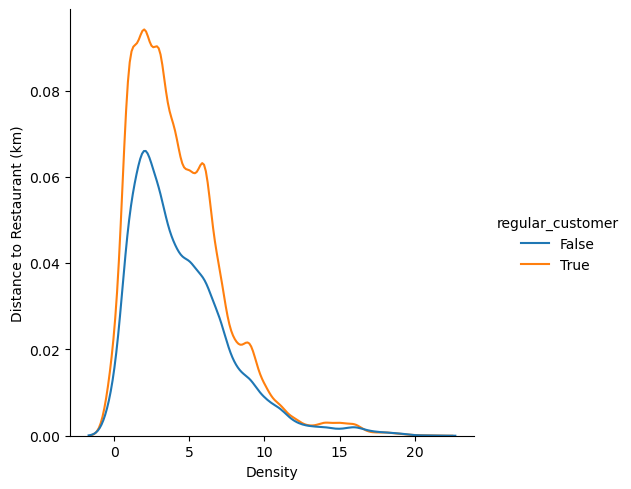

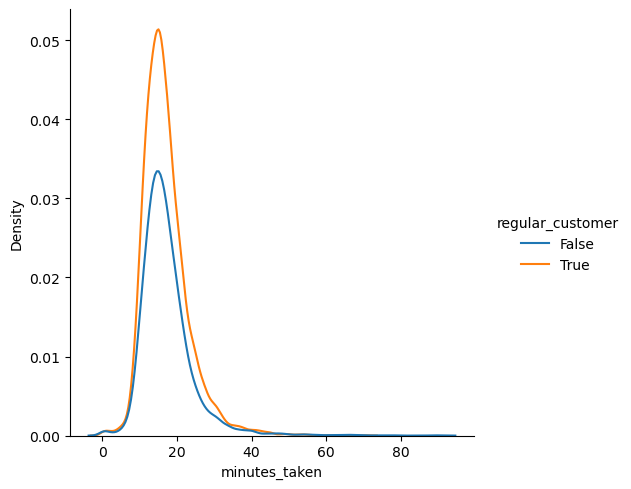

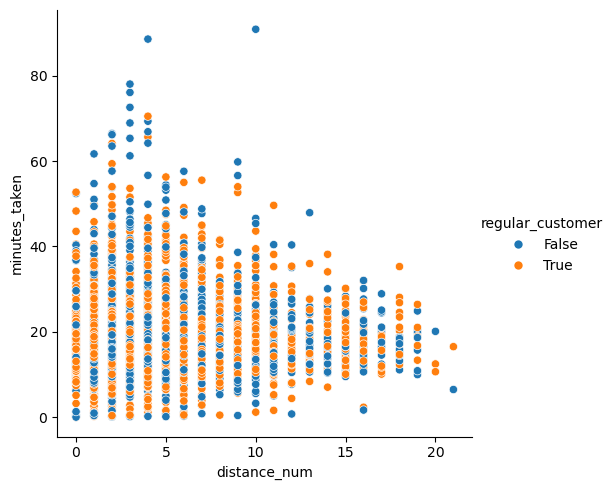

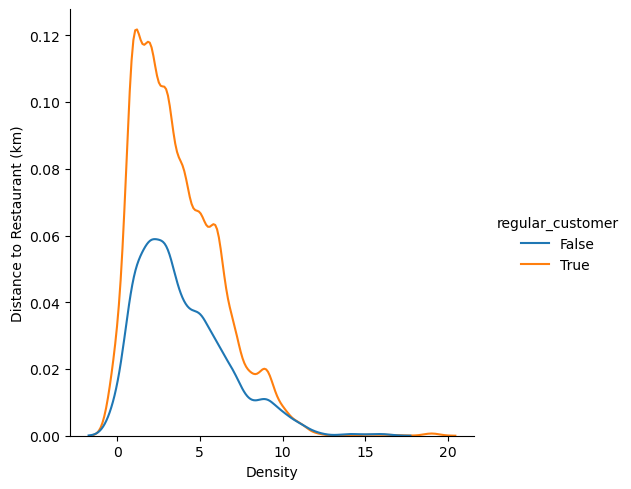

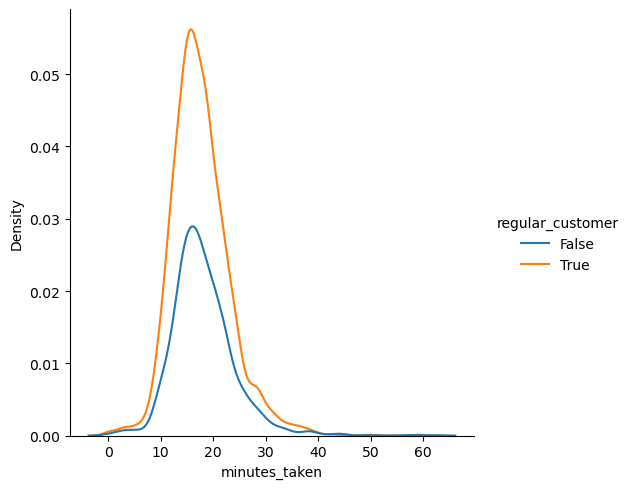

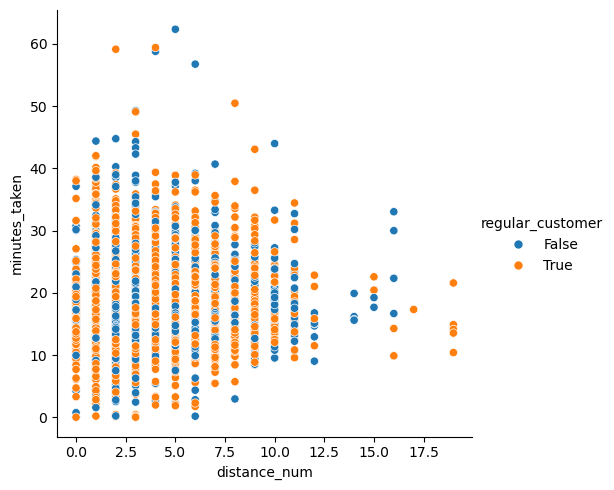

In [527]:
import seaborn as sns
# plotting the density of the distance to the restaurant by type of customer
for i in [ pizza, swaad]:
    g=sns.displot(data=i, x="distance_num", hue="regular_customer", kind="kde")
    g.set_axis_labels("Density", "Distance to Restaurant (km)")
    sns.displot(data=i, x="minutes_taken", hue="regular_customer", kind="kde")
    sns.relplot(data=i, x="distance_num", y="minutes_taken", hue="regular_customer")
# I  tried to set the restaurant name as plot title within the loop but couldn't    
    

In [ ]:
X = orders2['regular_customer']  # Independent variable
y = orders2['minutes_taken'] 

In [553]:
import statsmodels.api as sm
x_matrix = np.matrix([orders2['regular_customer'],orders2['distance_num']]).T
y = orders2['minutes_taken']    # Dependent variable
# Fit the OLS model
result_time = sm.OLS(y, x_matrix, missing='drop').fit()
print(result_time.summary()) ###how do i change the names of the variables being displayed?

x_matrix_p = np.matrix([pizza['regular_customer'],pizza['distance_num']]).T
y_p = pizza['minutes_taken']    # Dependent variable
# Fit the OLS model
result_time_pizza = sm.OLS(y_p, x_matrix_p, missing='drop').fit()
print(result_time_pizza.summary())

                                 OLS Regression Results                                
Dep. Variable:          minutes_taken   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.698
Method:                 Least Squares   F-statistic:                          2.427e+04
Date:                Sat, 08 Mar 2025   Prob (F-statistic):                        0.00
Time:                        19:52:13   Log-Likelihood:                         -78532.
No. Observations:               21026   AIC:                                  1.571e+05
Df Residuals:                   21024   BIC:                                  1.571e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Looking at the graphs, it seems like both of the main restaurants, Aura Pizzas and Swaad have more repeat customers than otherwise with no clear pattern w.r.t. proximity to the restaurant nor w.r.t. the time taken to complete the order. Interestingly, we see a negative relationship between distance to the customer and the time taken to complete the order in the case of Aura Pizzas.

According to the regressions however, regular customers and longer distances are associated with a higher delivery time (even for Aura pizzas).

### How do the types of promotions offered vary?

<Axes: xlabel='regular_customer', ylabel='Proportion'>

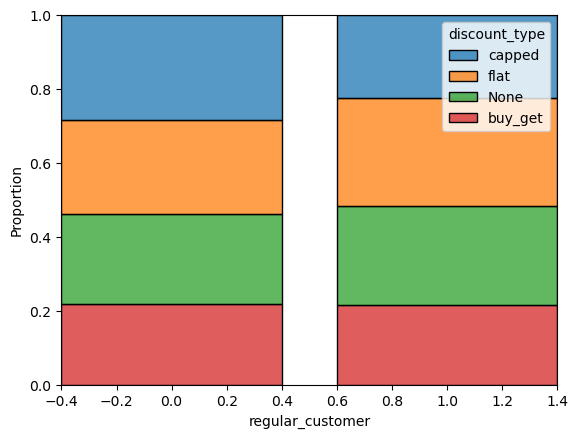

In [430]:

#g=sns.countplot(orders2, hue="discount_type",hue="regular_customer",stat="percent") # 

sns.histplot(
    data=orders2,
    x="regular_customer", hue="discount_type",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)

#sns.countplot(not_regular, x="discount_type",stat="percent") # hue="regular_customer"


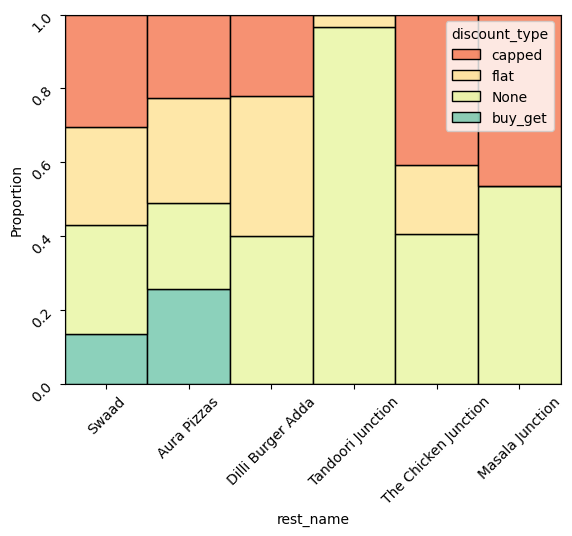

In [448]:

#g=sns.countplot(orders2, hue="discount_type",hue="regular_customer",stat="percent") # 

g=sns.histplot(
    data=orders2,
    x="rest_name", hue="discount_type",
    multiple="fill", stat="proportion",
    discrete=True, palette='Spectral'
)
g.tick_params(labelrotation=45)

#sns.countplot(not_regular, x="discount_type",stat="percent") # hue="regular_customer"


The graphs above aren't the best, but we see that regular customers are slightly more likely to either get no promotional offers or get flat discounts and less likely to get capped discounts. The different restaurants offer very different types of promotions. (though we do not have enough orders for the 4 on the right). 

### What time of the day do customers usually place an order?

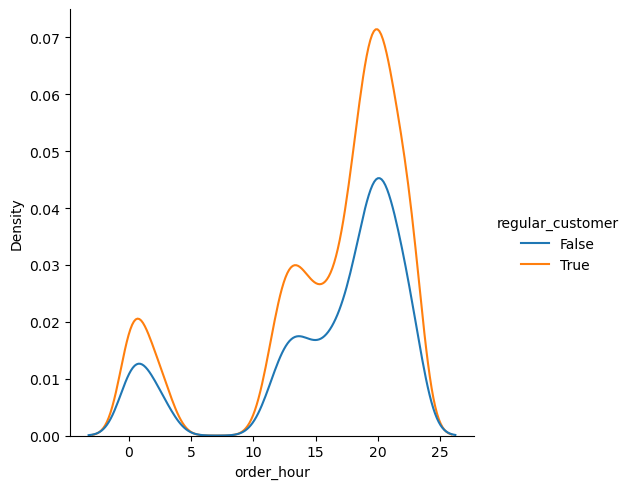

In [503]:
sns.displot(data=orders2, x="order_hour", hue="regular_customer", kind="kde")


2024-09-01 00:13:00
2025-01-31 23:59:00


<Axes: xlabel='order_time_dt', ylabel='Count'>

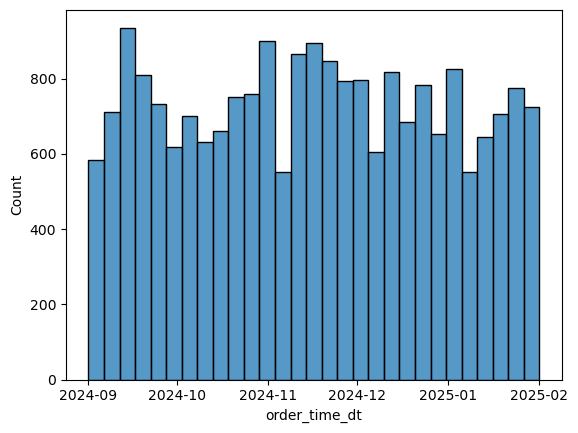

In [561]:
print(orders2.order_time_dt.min())
print(orders2.order_time_dt.max())
sns.histplot(data=orders2, x="order_time_dt")

<Axes: xlabel='order_day', ylabel='Count'>

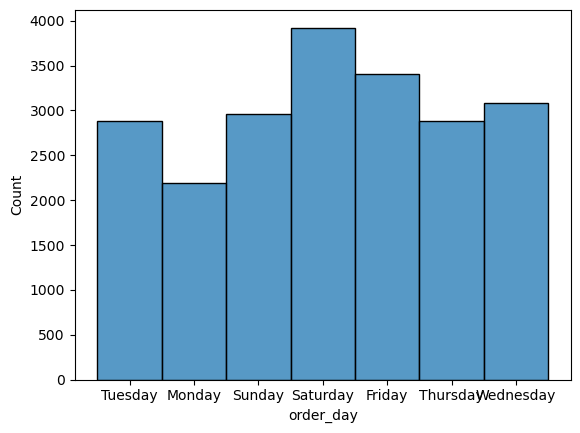

In [558]:
sns.histplot(data=orders2, x="order_day")

Most of the orders were received on Friday and Saturday and the least on Mondays. The timings of the orders are also intuitive: Highest number of orders placed during dinner time followed by lunch hours and some midnight snacks, with virtually no orders being placed between 5am and 10am.